# Getting Started with Kiara Network Analysis

This notebook demonstrates how to use the kiara network analysis plugin to load, process, and visualize network data.

## Prerequisites

Make sure you have the following files ready:
- An edges file (CSV format with source and target columns)
- A nodes file (CSV format with node information)

You can upload these files or place them in a known location on your system.

In [1]:
from pathlib import Path
# Import required libraries
from kiara.api import KiaraAPI
from kiara.interfaces.cli import terminal_print
import rustworkx as rx
from rustworkx.visualization import graphviz_draw, mpl_draw
import matplotlib.pyplot as plt
from kiara_plugin.network_analysis.defaults import LABEL_COLUMN_NAME
import altair as alt
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
from typing import Union
from kiara.models.values.value import Value
from kiara_plugin.network_analysis.models import NetworkData
from kiara_plugin.network_analysis.utils import extract_network_data
from kiara_plugin.network_analysis.utils.notebooks.jupyter import prepare_mpl_graph_jupyter, \
    prepare_altair_graph_jupyter
from kiara_plugin.network_analysis.utils.notebooks.jupyter import prepare_plotly_graph_jupyter



def create_table(path: Union[str, Path, None])-> Union[str, Value]:
    if path is None:
        return None
    elif isinstance(path, Path):
        path = path.as_posix()

    kiara_file = kiara.run_job("import.local.file", inputs={"path": path})["file"]
    kiara_table = kiara.run_job("create.table.from.file", inputs={"file": kiara_file})["table"]

    return kiara_table

# Initialize Kiara API
kiara = KiaraAPI.instance()
kiara.set_active_context("network_analysis", create=True)

print("Kiara network analysis environment initialized!")

Kiara network analysis environment initialized!


## File Loading

Update the file paths below to point to your edges and nodes files:

In [2]:
# Update these paths to point to your actual files
edges_file_path = "/home/markus/projects/kiara/plugins/kiara_plugin.network_analysis/examples/data/journals/JournalEdges1902.csv"  # Update this path
nodes_file_path = "/home/markus/projects/kiara/plugins/kiara_plugin.network_analysis/examples/data/journals/JournalNodes1902.csv"  # Update this path (optional)

# Set to None if you don't have a nodes file
# nodes_file_path = None

print(f"Edges file: {edges_file_path}")
print(f"Nodes file: {nodes_file_path}")

Edges file: /home/markus/projects/kiara/plugins/kiara_plugin.network_analysis/examples/data/journals/JournalEdges1902.csv
Nodes file: /home/markus/projects/kiara/plugins/kiara_plugin.network_analysis/examples/data/journals/JournalNodes1902.csv


In [3]:
# Load the tables
edges_table = create_table(edges_file_path)
if edges_table is not None:
    print("Edges table loaded successfully!")
else:
    print("Edges table not loaded - please check the file path")

nodes_table = create_table(nodes_file_path)
if nodes_table is not None:
    print("Nodes table loaded successfully!")
else:
    print("Nodes table not loaded (this is optional)")


Edges table loaded successfully!
Nodes table loaded successfully!


In [4]:
# Create network data
if edges_table is not None:
    assemble_inputs = {
        "edges": edges_table,
        "nodes": nodes_table
    }
    kiara_network_data = kiara.run_job("assemble.network_data", inputs=assemble_inputs)["network_data"]
    print("Network data created successfully!")
else:
    kiara_network_data = None
    print("Cannot create network data without edges table")

Network data created successfully!


## Network Visualization

Now let's create different visualizations of the network data:

/home/markus/projects/kiara/plugins/kiara_plugin.network_analysis/src/kiara_plugin/network_analysis/utils/notebooks/jupyter.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/home/markus/projects/kiara/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/markus/projects/kiara/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33865 (\N{CJK UNIFIED IDEOGRAPH-8449}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/markus/projects/kiara/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37291 (\N{CJK UNIFIED IDEOGRAPH-91AB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/markus/projects/kiara/.venv/lib/python3.13

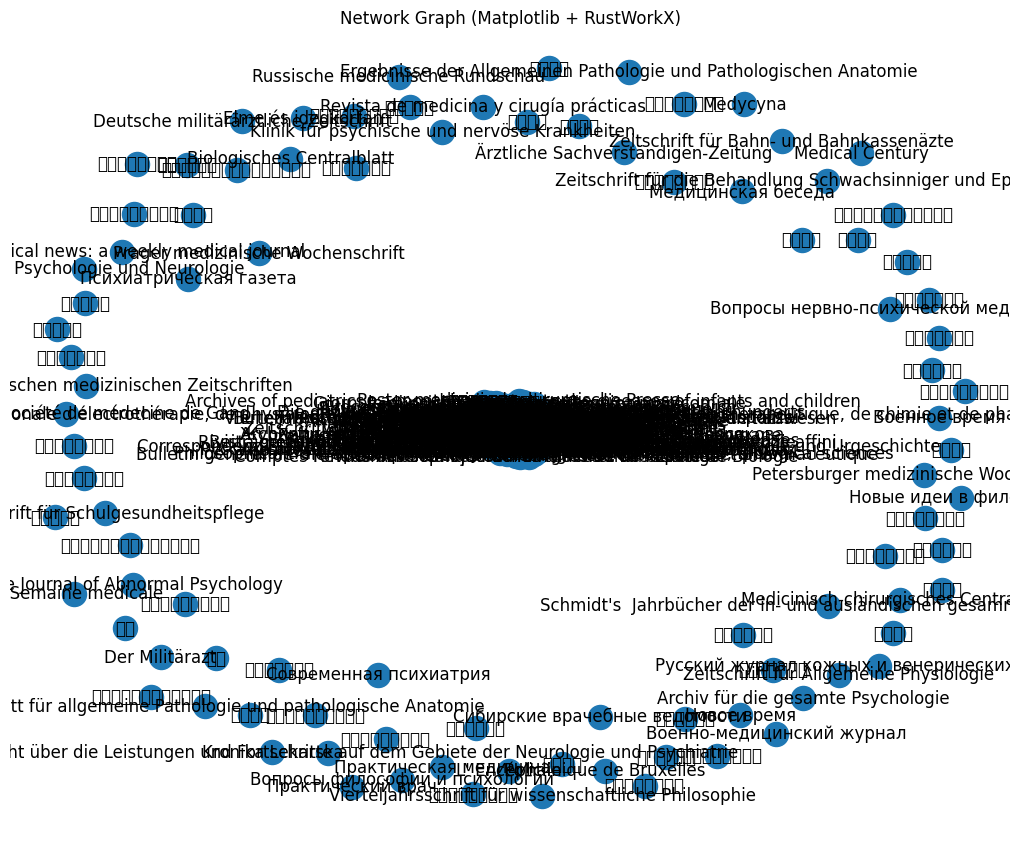

In [5]:

# Create matplotlib visualization
prepare_mpl_graph_jupyter(kiara_network_data)

In [6]:
# Create Plotly visualization
fig = prepare_plotly_graph_jupyter(kiara_network_data)
if fig:
    fig.show()

In [7]:


# Create Altair visualization
chart = prepare_altair_graph_jupyter(kiara_network_data)
if chart:
    chart.show()

alt.LayerChart(...)

## Summary

This notebook demonstrated how to:

1. **Initialize the Kiara environment** for network analysis
2. **Load network data** from CSV files (edges and optionally nodes)
3. **Create network data objects** using Kiara's data processing pipeline
4. **Visualize networks** using three different approaches:
   - **Matplotlib**: Static visualization with basic layout
   - **Plotly**: Interactive visualization with hover effects and zoom/pan
   - **Altair**: Interactive visualization with selection capabilities

### Next Steps

- Try loading your own network data files
- Experiment with different visualization parameters
- Explore additional Kiara network analysis operations
- Use the network data for further analysis or export to other formats

### Tips

- Make sure your edges file has at least 'source' and 'target' columns
- Node files are optional but can provide additional metadata
- All visualizations use RustWorkX as the underlying graph library for performance
- Interactive features work best in JupyterLab or modern Jupyter environments